In [1]:
# cnn model
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import keras
import sklearn
from matplotlib import pyplot
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.utils import to_categorical
try: from sklearn.model_selection import train_test_split
except: from sklearn.cross_validation import train_test_split
import pandas as pd
import numpy as np
from sklearn import datasets
import sys
sys.path.insert(0,'..')

from time import time
from keras.callbacks import TensorBoard

Using TensorFlow backend.


In [2]:
def evaluate(y_test,m):
    #evaluate results
    mse=sklearn.metrics.mean_squared_error(y_test,m)
    mabs=sklearn.metrics.mean_absolute_error(y_test,m)
    exvar=sklearn.metrics.explained_variance_score(y_test,m)   
    print('Mean Squa Error :',mse)
    print('Mean Abso Error :',mabs)
    print('Expl. Variance  :',exvar,'\n')

### Read the train & test and preprocessing

In [3]:
# load data
import pandas as pd
# load data
df=pd.read_csv('sgemm_product.csv')

del df['Run2 (ms)']
del df['Run3 (ms)']
del df['Run4 (ms)'] #Next_Tmin
# drop nan 
df = df.dropna()
# the head of df
df.head()

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,Run1 (ms)
0,16,16,16,8,8,8,8,2,1,1,0,0,0,0,115.26
1,16,16,16,8,8,8,8,2,1,1,0,0,0,1,78.13
2,16,16,16,8,8,8,8,2,1,1,0,0,1,0,79.84
3,16,16,16,8,8,8,8,2,1,1,0,0,1,1,84.32
4,16,16,16,8,8,8,8,2,1,1,0,1,0,0,115.13


In [4]:
# df to values
df = df.values
Y = df[:,14]
X = df[:,0:14]

X = X.reshape(X.shape[0], X.shape[1], 1)
print(X.shape)

x_train,x_test,y_train,y_test=train_test_split(X, Y, test_size=0.2, random_state=1) 
x_train_, x_test_, y_train_, y_test_ = x_train, x_test, y_train, y_test

(241600, 14, 1)


In [5]:
def standardize(train, test):

    mean = np.mean(train, axis=0)
    std = np.std(train, axis=0)+0.000001

    X_train = (train - mean) / std
    X_test = (test - mean) /std
    return X_train, X_test

x_train, x_test = standardize(x_train, x_test)

In [6]:
x_test.shape

(48320, 14, 1)

In [7]:
# print(np.any(np.isnan(X_test)))
# print(np.any(np.isnan(y_test)))

### Creation structure of CNN

In [8]:
# build CNN
def CNN_net():
    
    model = Sequential()
    model.add(Conv1D(64, 3, activation="relu", input_shape=(X.shape[1],1)))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Dropout(0.5))
    
    model.add(Conv1D(128, 3, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Dropout(0.5))    
    
    
    model.add(Flatten())
    #model.add(Dense(64, activation="relu"))
    model.add(Dense(1))
    model.compile(loss="mse", optimizer="adam")
    
    return model

In [9]:
# Parametres
verbose, epochs, batch_size = 1, 250, 5
# initialize the model object
clf_cnn = CNN_net()
# fit network #Train the model using tensorboard instance in the callbacks
history = clf_cnn.fit(x_train, y_train, batch_size=batch_size,
          epochs=epochs, verbose=verbose, validation_data=(x_test, y_test))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Train on 193280 samples, validate on 48320 samples
Epoch 1/250
193280/193280 [==============================] - 90s 466us/step - loss: 66935.0073 - val_loss: 40333.2392
Epoch 2/250
193280/193280 [==============================] - 89s 460us/step - loss: 48701.4279 - val_loss: 36899.5665
Epoch 3/250
193280/193280 [==============================] - 89s 458us/step - loss: 42687.4023 - val_loss: 30467.4303
Epoch 4/250
193280/193280 [==============================] - 89s 461us/step - loss: 39630.9299 - val_loss: 29793.8347
Epoch 5/250
193280/193280 [==============================] - 88s 456us/step - loss: 38744.0135 - val_loss: 29020.3533
Epoch 6/250
193280/193280 [==============================] - 89s 459us/step - loss: 38099.7647 - val_loss: 28247.5824
Epoch 7/250
193280/193280 [==============================] - 93s 483us/step - loss: 37414.9328 - val_loss: 28330.7033
Epoch 8/250
193280/193280 [=============

193280/193280 [==============================] - 89s 459us/step - loss: 33011.4915 - val_loss: 27516.0187
Epoch 63/250
193280/193280 [==============================] - 89s 460us/step - loss: 32955.2660 - val_loss: 26686.2032
Epoch 64/250
193280/193280 [==============================] - 88s 458us/step - loss: 32653.0391 - val_loss: 28297.1968
Epoch 65/250
193280/193280 [==============================] - 89s 459us/step - loss: 33002.2713 - val_loss: 27766.5124
Epoch 66/250
193280/193280 [==============================] - 89s 463us/step - loss: 32879.0747 - val_loss: 26338.2046
Epoch 67/250
193280/193280 [==============================] - 89s 459us/step - loss: 32971.6616 - val_loss: 26281.0400
Epoch 68/250
193280/193280 [==============================] - 89s 460us/step - loss: 32869.8160 - val_loss: 26373.2467
Epoch 69/250
193280/193280 [==============================] - 90s 464us/step - loss: 32649.0235 - val_loss: 26247.5220
Epoch 70/250
193280/193280 [==============================] -

193280/193280 [==============================] - 98s 506us/step - loss: 32405.1295 - val_loss: 26600.1390
Epoch 131/250
193280/193280 [==============================] - 88s 455us/step - loss: 32152.4111 - val_loss: 26049.8120
Epoch 132/250
193280/193280 [==============================] - 94s 487us/step - loss: 32238.6159 - val_loss: 26344.7992
Epoch 133/250
193280/193280 [==============================] - 88s 457us/step - loss: 32090.4714 - val_loss: 26154.2561
Epoch 134/250
193280/193280 [==============================] - 90s 465us/step - loss: 32169.4192 - val_loss: 26053.5668
Epoch 135/250
193280/193280 [==============================] - 89s 458us/step - loss: 32219.0907 - val_loss: 26504.0664
Epoch 136/250
193280/193280 [==============================] - 88s 456us/step - loss: 31992.1864 - val_loss: 26080.1431
Epoch 137/250
193280/193280 [==============================] - 95s 493us/step - loss: 32177.2668 - val_loss: 26588.4992
Epoch 138/250
193280/193280 [=========================

193280/193280 [==============================] - 87s 452us/step - loss: 31810.0715 - val_loss: 26026.1504
Epoch 199/250
193280/193280 [==============================] - 102s 528us/step - loss: 31793.2367 - val_loss: 26394.2205
Epoch 200/250
193280/193280 [==============================] - 92s 476us/step - loss: 31806.9864 - val_loss: 27071.2549
Epoch 201/250
193280/193280 [==============================] - 84s 434us/step - loss: 32289.4424 - val_loss: 26011.3791
Epoch 202/250
193280/193280 [==============================] - 87s 448us/step - loss: 31682.4805 - val_loss: 26376.4130
Epoch 203/250
193280/193280 [==============================] - 86s 444us/step - loss: 31754.2407 - val_loss: 26147.1820
Epoch 204/250
193280/193280 [==============================] - 89s 459us/step - loss: 31879.1473 - val_loss: 26114.4230
Epoch 205/250
193280/193280 [==============================] - 86s 447us/step - loss: 31604.5872 - val_loss: 26161.0205
Epoch 206/250
193280/193280 [========================

In [10]:
ypred = clf_cnn.predict(x_test)

print(" Model.evaluate : ",clf_cnn.evaluate(x_train, y_train),'\n')

#evaluate results
mse=sklearn.metrics.mean_squared_error(y_test,ypred)
mabs=sklearn.metrics.mean_absolute_error(y_test,ypred)
exvar=sklearn.metrics.explained_variance_score(y_test,ypred)   
print('Mean Squa Error :',mse)
print('Mean Abso Error :',mabs)
print('Expl. Variance  :',exvar)

193280/193280 [==============================] - 6s 29us/step
 Model.evaluate :  26271.100231286862 

Mean Squa Error : 26339.868101671032
Mean Abso Error : 71.69647786034022
Expl. Variance  : 0.8042372474988787


In [11]:
clf_cnn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 12, 64)            256       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 6, 64)             0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 6, 64)             0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 4, 128)            24704     
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 2, 128)            0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 2, 128)            0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 256)              

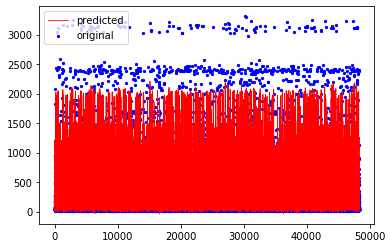

In [12]:
#https://www.datatechnotes.com/2019/12/how-to-fit-regression-data-with-cnn.html
x_ax = range(len(ypred))
plt.scatter(x_ax, y_test, s=5, color="blue", label="original")
plt.plot(x_ax, ypred, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()

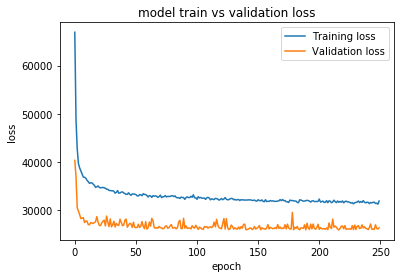

In [13]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model train vs validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Training loss','Validation loss'], loc='best')
plt.show()

### Testing the Novel Approach

### Feature Extraction by CNN

In [14]:
from keras.models import Model
# from the first Fully-Connected layer 
layer_name = 'dense_1'
intermediate_layer_model = Model(inputs=clf_cnn.input,
                                 outputs=clf_cnn.get_layer(layer_name).output)

In [15]:
# Save the features of the train dataset to use it in future.
out_cnn_train = intermediate_layer_model.predict(x_train)
# Save the features of the test dataset to use it in future.
out_cnn_test = intermediate_layer_model.predict(x_test)

In [16]:
print('Training Features (from CNN) Shape:', out_cnn_train.shape)
print('Training Labels (from CNN) Shape:', y_train.shape,'\n')

print('Test Features (from CNN) Shape:', out_cnn_test.shape)
print('Test Labels (from CNN) Shape:', y_test.shape,'\n')

print('Test Features original Shape:', x_train_.shape)
print('Test Features original Shape:', x_test_.shape)

Training Features (from CNN) Shape: (193280, 1)
Training Labels (from CNN) Shape: (193280,) 

Test Features (from CNN) Shape: (48320, 1)
Test Labels (from CNN) Shape: (48320,) 

Test Features original Shape: (193280, 14, 1)
Test Features original Shape: (48320, 14, 1)


### Classification by CNN + Random Forest + MLP

In [17]:
from djinn import djinn
print("djinn example")    
modelname="reg_djinn_test"   # name the model
ntrees=1                 # number of trees = number of neural nets in ensemble
maxdepth=5               # max depth of tree -- optimize this for each data set
dropout_keep=1.0         # dropout typically set to 1 for non-Bayesian models

#initialize the model
model=djinn.DJINN_Regressor(ntrees,maxdepth,dropout_keep)
x_train, y_train, x_test, y_test = out_cnn_train, y_train, out_cnn_test, y_test

# find optimal settings: this function returns dict with hyper-parameters
# each djinn function accepts random seeds for reproducible behavior
optimal=model.get_hyperparameters(x_train, y_train, random_state=42)
batchsize=optimal['batch_size']
learnrate=optimal['learn_rate']
epochs=optimal['epochs']

# batchsize=304
# learnrate=0.002474296684203603
# epochs=210
 
# train the model with hyperparameters determined above
model.train(x_train,y_train,epochs=epochs,learn_rate=learnrate, batch_size=batchsize, 
              display_step=1, save_files=True, file_name=modelname, 
              save_model=True,model_name=modelname, random_state=1)

# *note there is a function model.fit(x_train,y_train, ... ) that wraps 
# get_hyperparameters() and train(), so that you do not have to manually
# pass hyperparameters to train(). However, get_hyperparameters() can
# be expensive, so I recommend running it once per dataset and using those
# hyperparameter values in train() to save computational time

# make predictions
m=model.predict(x_test) #returns the median prediction if more than one tree

#evaluate results
evaluate(y_test,m)

#close model 
model.close_model()

djinn example
Finding optimal hyper-parameters...
Determining learning rate...


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Determining number of epochs needed...



Optimal learning rate:  0.00180316388696816
Optimal # epochs:  210
Optimal batch size:  9664



Epoch: 0001 cost= 0.079475582
Epoch: 0002 cost= 0.014465848
Epoch: 0003 cost= 0.011698512
Epoch: 0004 cost= 0.009344819
Epoch: 0005 cost= 0.007739248
Epoch: 0006 cost= 0.005875993
Epoch: 0007 cost= 0.004394450
Epoch: 0008 cost= 0.003169682
Epoch: 0009 cost= 0.002749586
Epoch: 0010 cost= 0.002501528
Ep

Epoch: 0207 cost= 0.002300226
Epoch: 0208 cost= 0.002311097
Epoch: 0209 cost= 0.002346627
Epoch: 0210 cost= 0.002327433
Optimization Finished!
Model saved in: ./reg_djinn_test_tree0.ckpt

INFO:tensorflow:Restoring parameters from ./reg_djinn_test_tree0.ckpt
Model 0 restored
Mean Squa Error : 25921.343913506673
Mean Abso Error : 69.78609711108288
Expl. Variance  : 0.8073396836746638 



### Classification by CNN + ( SVM, XGB, DTree, ExtraTrees, RandomFores)


In [ ]:
#https://stackoverflow.com/questions/41925157/logisticregression-unknown-label-type-continuous-using-sklearn-in-python
import numpy as np
from sklearn import linear_model
from sklearn import svm

classifiers = [
    svm.SVR(gamma='scale'),
    linear_model.SGDRegressor(),
    linear_model.BayesianRidge(),
    linear_model.LassoLars(),
    #linear_model.ARDRegression(),
    #linear_model.PassiveAggressiveRegressor(),
    linear_model.TheilSenRegressor(),
    linear_model.LinearRegression()
              ]

for item in classifiers:
    print(item,'\n')
    clf = item
    clf.fit(out_cnn_train, y_train)
    #print(clf.predict(predictionData),'\n')
    #Feed the features of the test to ExtraTreesClassifier Classifier to predict its class
    m = clf.predict(out_cnn_test)
    #evaluate results
    mse=sklearn.metrics.mean_squared_error(y_test,m)
    mabs=sklearn.metrics.mean_absolute_error(y_test,m)
    exvar=sklearn.metrics.explained_variance_score(y_test,m)   
    print('Mean Squa Error :',mse)
    print('Mean Abso Error :',mabs)
    print('Expl. Variance  :',exvar,'\n')
    print("================================================================================")

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False) 

Mean Squa Error : 28520.609591358487
Mean Abso Error : 68.8195993417581
Expl. Variance  : 0.7898773400823373 

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False) 

Mean Squa Error : 2.65278854087327e+26
Mean Abso Error : 9310574530598.125
Expl. Variance  : -1.3277848936542804e+21 

BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, compute_score=False, copy_X=True,
              fit_intercept=True, lambda_1=1e-06, lambda_2=1e-06, n_iter=300,
              normalize=False, tol=0.001, verbose=False) 

Mean

In [ ]:
#Feed the extracted features with the labels to RANDOM FOREST 
from xgboost import XGBRegressor
XGBModel = XGBRegressor()
XGBModel.fit(out_cnn_train, y_train , verbose=False)
# Get the mean absolute error on the validation data :
XGBpredictions = XGBModel.predict(out_cnn_test)
print('CNN XGBRegressor      ')
evaluate(y_test,XGBpredictions)

    
from sklearn.ensemble import ExtraTreesRegressor
Ext = ExtraTreesRegressor(n_estimators=10)
Ext.fit(out_cnn_train, y_train)
#Feed the features of the test to ExtraTreesClassifier Classifier to predict its class
predictionsCNN_Ext = Ext.predict(out_cnn_test)
print('CNN ExtraTreesRegressor      ')
evaluate(y_test,predictionsCNN_Ext)


from sklearn import tree
clf_dt = tree.DecisionTreeRegressor()
clf_dt.fit(out_cnn_train, y_train)
# Get the mean absolute error on the validation data :
clf_dtpredictions = clf_dt.predict(out_cnn_test)
print('CNN DecisionTreeRegressor      ')
evaluate(y_test,clf_dtpredictions)

In [ ]:
out_cnn_train.shape

###  MLP

In [ ]:
# Regression Example With Boston Dataset: Baseline
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from keras.wrappers.scikit_learn import KerasClassifier


def baseline_model():
	# create model
	model = Sequential()
	model.add(Dense(128, input_dim=out_cnn_train.shape[1], kernel_initializer='normal', activation='relu'))
	model.add(Dense(64, activation='relu'))
	model.add(Dense(1, kernel_initializer='normal'))
	# Compile model
	model.compile(loss='mean_squared_error', optimizer='adam')
	return model


clf_MLP = KerasClassifier(build_fn = baseline_model, epochs = 50, batch_size=5, verbose=1)
clf_MLP.fit(out_cnn_train, y_train)
y_predmlp = clf_MLP.predict(out_cnn_test)

#print("CNN MLP Model.evaluate : ",clf_MLP.evaluate(out_cnn_test, y_train),'\n')
#evaluate results
mse=sklearn.metrics.mean_squared_error(y_test,y_predmlp)
mabs=sklearn.metrics.mean_absolute_error(y_test,y_predmlp)
exvar=sklearn.metrics.explained_variance_score(y_test,y_predmlp)   
print('CNN MLP Mean Squa Error :',mse)
print('CNN MLP Mean Abso Error :',mabs)
print('CNN MLP Expl. Variance  :',exvar)

### Classification by RandomForest, ExtraTrees, XGBRegressor

In [ ]:
x_train_ = x_train_.reshape(x_train_.shape[0], x_train_.shape[1])
x_test_  = x_test_.reshape(x_test_.shape[0], x_test_.shape[1])

In [ ]:
# RandomForestClassifier : from dataset originl
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100)
rf.fit(x_train_, y_train_)
predictions = rf.predict(x_test_)
print('CNN RandomForestRegressor      ')
evaluate(y_test_,predictions)


#Feed the extracted features with the labels to RANDOM FOREST 
from xgboost import XGBRegressor
XGBModel = XGBRegressor()
XGBModel.fit(x_train_, y_train_ , verbose=False)
# Get the mean absolute error on the validation data :
XGBpredictions = XGBModel.predict(x_test_)
print('CNN XGBRegressor      ')
evaluate(y_test_,XGBpredictions)

    
from sklearn.ensemble import ExtraTreesRegressor
Ext = ExtraTreesRegressor(n_estimators=10)
Ext.fit(x_train_, y_train_)
#Feed the features of the test to ExtraTreesClassifier Classifier to predict its class
predictionsCNN_Ext = Ext.predict(x_test_)
print('CNN ExtraTreesRegressor      ')
evaluate(y_test_,predictionsCNN_Ext)